In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_2015 = os.path.join('sb_ca2015_all_csv_v3.txt')
data_2015_df = pd.read_csv(data_2015)

data_2016 = os.path.join('sb_ca2016_all_csv_v3.txt')
data_2016_df = pd.read_csv(data_2016)

data_2017 = os.path.join('sb_ca2017_all_csv_v2.txt')
data_2017_df = pd.read_csv(data_2017)

subgroups = os.path.join('Subgroups.txt')
subgroups_df = pd.read_csv(subgroups, header=None)

tests = os.path.join('Tests.txt')
tests_df = pd.read_csv(tests)

schools = os.path.join('pubschls.txt')
schools_df = pd.read_csv(schools, sep='\t')

#schools_df.head()

In [2]:
schools_df['CDSCode'] = schools_df['CDSCode'].astype(str)
schools_df['School Code'] = schools_df['CDSCode'].str[-7:]
schools_df['School Code'] = schools_df['School Code'].astype(float)

In [3]:
data = [data_2015_df, data_2016_df, data_2017_df]
data = pd.concat(data)
data.shape

(9584749, 38)

In [4]:
data = data[data['School Code'] != 0]
data = data[data['Subgroup ID'] == 1]
data.shape

(261804, 38)

In [5]:
data = pd.merge(data, schools_df, how='left', on='School Code')

In [6]:
data = data[data['Percentage Standard Exceeded'] != '*']
data = pd.merge(data, tests_df, how='left', on='Test Id')
data.shape

(234835, 89)

In [7]:
data['Percentage Standard Met and Above'] = data['Percentage Standard Met and Above'].astype(float)
data['City'] = data['City'].astype(str)
data['Zip'] = data['Zip'].astype(str)
data['EILName'] = data['EILName'].astype(str)
data['GSoffered'] = data['GSoffered'].astype(str)
data['EdOpsName'] = data['EdOpsName'].astype(str)
data['SOCType'] = data['SOCType'].astype(str)
data['Test Name'] = data['Test Name'].astype(str)

In [8]:
data_summary = data.groupby(['School', 'County', 'District', 'Grade', 'Test Name', 'City', 'EILName', 'GSoffered', 'EdOpsName', 'SOCType', 'School Code']).agg({'Percentage Standard Met and Above': ['mean']}).rename(columns={'mean': '2015-2017 Avg Percentage Standard Met and Above'})

rounding = lambda x: round(x, 2)
data_summary = data_summary.apply(rounding)
data_summary.columns = data_summary.columns.droplevel()
data_summary = data_summary.reset_index()
data_summary['Test Name'] = data_summary['Test Name'].str[5:]
bins = [0, 6, 9, 14]
group_names = ['Elementary School', 'Middle School', 'High School']
data_summary['School Type by Grade #'] = pd.cut(data_summary['Grade'], bins, labels = group_names)
#data_summary

In [9]:
data_summary.to_csv("School_Scores_Data_Summary_v2.csv", index=False, header=True)

In [10]:
county_school_summary = data_summary.groupby(['County', 'Test Name']).agg({'2015-2017 Avg Percentage Standard Met and Above': ['mean']}).rename(columns={'mean': '2015-2017 Avg Percentage Standard Met and Above'})
county_school_summary = county_school_summary.apply(rounding)
county_school_summary.columns = county_school_summary.columns.droplevel()
county_school_summary = county_school_summary.reset_index()
#county_school_summary

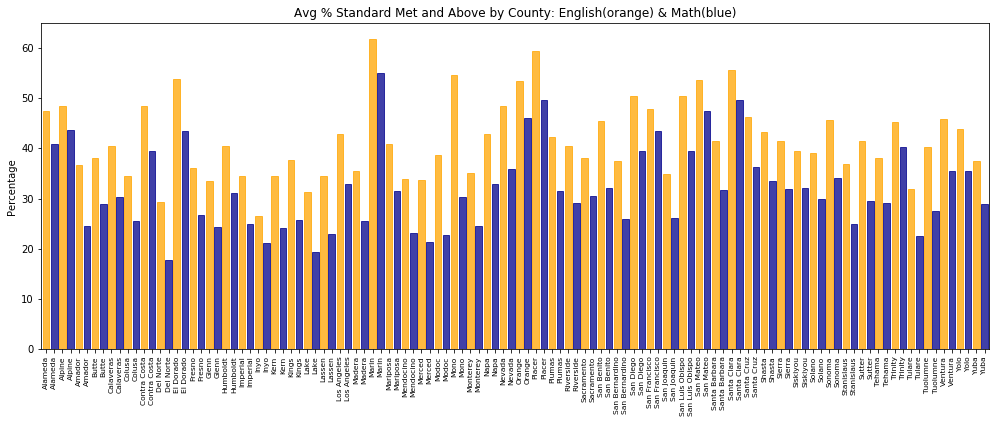

In [11]:
types = county_school_summary['Test Name'].unique()
colors = ['orange', 'darkblue']
scores = county_school_summary['2015-2017 Avg Percentage Standard Met and Above']
counties = county_school_summary['County']
x_values = np.arange(len(counties))
barlist = plt.bar(x_values, scores, alpha=0.75, tick_label=counties, align="edge")
tick_locations = [value+0.4 for value in x_values]
plt.xticks(tick_locations, rotation='vertical', size=7.5, )
plt.xlim(-0.25, len(x_values))
plt.gcf().set_size_inches(17, 6)
for i in range(len(barlist)):
    if i % 2 == 0:
        barlist[i].set_color(colors[0])
    else:
        barlist[i].set_color(colors[1])
        
plt.title("Avg % Standard Met and Above by County: English(orange) & Math(blue)")
plt.ylabel("Percentage")
plt.savefig("County_Scores.png")
plt.show()

In [12]:
DelNorte_scores = county_school_summary.loc[(county_school_summary['County'] == 'Del Norte') & (county_school_summary['Test Name'] == 'Mathematics')]
Lake_scores = county_school_summary.loc[(county_school_summary['County'] == 'Lake') & (county_school_summary['Test Name'] == 'Mathematics')]
Inyo_scores = county_school_summary.loc[(county_school_summary['County'] == 'Inyo') & (county_school_summary['Test Name'] == 'Mathematics')]
Marin_scores = county_school_summary.loc[(county_school_summary['County'] == 'Marin') & (county_school_summary['Test Name'] == 'Mathematics')]
Placer_scores = county_school_summary.loc[(county_school_summary['County'] == 'Placer') & (county_school_summary['Test Name'] == 'Mathematics')]
SantaClara_scores = county_school_summary.loc[(county_school_summary['County'] == 'Santa Clara') & (county_school_summary['Test Name'] == 'Mathematics')]

In [13]:
city_school_summary = data_summary.groupby(['City', 'Test Name']).agg({'2015-2017 Avg Percentage Standard Met and Above': ['mean']}).rename(columns={'mean': '2015-2017 Avg Percentage Standard Met and Above'})
city_school_summary = city_school_summary.apply(rounding)
city_school_summary.columns = city_school_summary.columns.droplevel()
city_school_summary = city_school_summary.reset_index()
#city_school_summary.head()

In [14]:
Marin = os.path.join('Marin.csv')
Marin_df = pd.read_csv(Marin)
Marin_cost = round(Marin_df['MedianSoldPrice_AllHomes'].mean(), 2)

DelNorte = os.path.join('DelNorte.csv')
DelNorte_df = pd.read_csv(DelNorte)
DelNorte_cost = round(DelNorte_df['MedianSoldPrice_AllHomes'].mean(), 2)

Lake = os.path.join('Lake.csv')
Lake_df = pd.read_csv(Lake)
Lake_cost = round(Lake_df['MedianSoldPrice_AllHomes'].mean(), 2)

Inyo = os.path.join('Inyo.csv')
Inyo_df = pd.read_csv(Inyo)
Inyo_cost = round(Inyo_df['MedianSoldPrice_AllHomes'].mean(), 2)

Placer = os.path.join('Placer.csv')
Placer_df = pd.read_csv(Placer)
Placer_cost = round(Placer_df['MedianSoldPrice_AllHomes'].mean(), 2)

SantaClara = os.path.join('SantaClara.csv')
SantaClara_df = pd.read_csv(SantaClara)
SantaClara_cost = round(SantaClara_df['MedianSoldPrice_AllHomes'].mean(), 2)

In [15]:
extremes_df = pd.DataFrame()
extremes_df['County'] = ['Marin', 'Del Norte', 'Lake', 'Inyo', 'Placer', 'Santa Clara']
extremes_df['County Home Cost'] = [Marin_cost, DelNorte_cost, Lake_cost, Inyo_cost, Placer_cost, SantaClara_cost]
scores = [DelNorte_scores, Lake_scores, Inyo_scores, Marin_scores, Placer_scores, SantaClara_scores]
scores = pd.concat(scores)

extremes_df = pd.merge(extremes_df, scores, how='left', on='County')
extremes_df = extremes_df.sort_values(by=['County Home Cost'], ascending=False)
extremes_df

,County,County Home Cost,Test Name,2015-2017 Avg Percentage Standard Met and Above
5,Santa Clara,734082.64,Mathematics,49.71
0,Marin,713700.87,Mathematics,54.93
4,Placer,338510.31,Mathematics,49.72
3,Inyo,253792.84,Mathematics,21.16
2,Lake,180231.73,Mathematics,19.27
1,Del Norte,171954.52,Mathematics,17.86


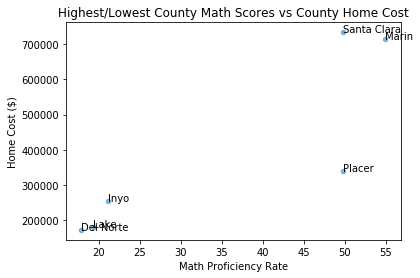

In [16]:
ax = extremes_df.plot.scatter(x='2015-2017 Avg Percentage Standard Met and Above', y='County Home Cost', alpha=0.5)
for i, txt in enumerate(extremes_df.County):
    ax.annotate(txt, (extremes_df['2015-2017 Avg Percentage Standard Met and Above'].iat[i],extremes_df['County Home Cost'].iat[i]))

plt.title("Highest/Lowest County Math Scores vs County Home Cost")
plt.xlabel("Math Proficiency Rate")
plt.ylabel("Home Cost ($)")
plt.savefig("Extremes.png")
plt.show()